In [795]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math

from ipywidgets import interact

In [945]:
N = 100
F_max = 1.0
sigma = N * 0.1
width = (sigma * 3.0) / N # https://en.wikipedia.org/wiki/68–95–99.7_rule
scale = (1.0 - (width * 2.0))

def f(v): # [0, 1]
    v = v * scale
    v = v + width
    x = round(v * N)
    return x # [0, N]

def f_inv(x): # [0, N]
    v = x / N
    v = v - width
    v = v / scale
    return v # [0, 1]

def fill(p, v):
    for i in range(0, N):
        d = i - f(v)
        r = F_max * math.exp(-1.0 * ((d**2) / (2.0 * (sigma**2))))
        p[i] = r

def vote(population):
    num = 0.0
    for i in range(0, N):
        num += f_inv(i) * population[i]
    den = 0.0
    for i in range(0, N):
        den += population[i]
    return num / den

In [946]:
print([f(v) for v in np.arange(0.0, 1.1, 0.1)])
print([f_inv(f(v)) for v in np.arange(0.0, 1.1, 0.1)])

[30.0, 34.0, 38.0, 42.0, 46.0, 50.0, 54.0, 58.0, 62.0, 66.0, 70.0]
[0.0, 0.10000000000000009, 0.20000000000000004, 0.29999999999999999, 0.40000000000000008, 0.5, 0.60000000000000009, 0.69999999999999984, 0.79999999999999993, 0.90000000000000002, 0.99999999999999989]


In [947]:
for v in np.arange(0.0, 1.1, 0.1):
    population = np.zeros(N)
    fill(population, v)
    voted = vote(population)
    expected = f_inv(f(v))
    err = abs(expected - voted)
    print("val", v, "vote", voted, "expect", expected, "err", err)

val 0.0 vote 0.000950232248429 expect 0.0 err 0.000950232248429
val 0.1 vote 0.100258465496 expect 0.1 err 0.000258465495823
val 0.2 vote 0.200059938355 expect 0.2 err 5.99383547014e-05
val 0.3 vote 0.300011838781 expect 0.3 err 1.18387811737e-05
val 0.4 vote 0.400001934539 expect 0.4 err 1.93453862968e-06
val 0.5 vote 0.49999981416 expect 0.5 err 1.85840048239e-07
val 0.6 vote 0.599996874184 expect 0.6 err 3.12581612449e-06
val 0.7 vote 0.699981969158 expect 0.7 err 1.80308423353e-05
val 0.8 vote 0.799912322222 expect 0.8 err 8.76777779758e-05
val 0.9 vote 0.899636721866 expect 0.9 err 0.000363278134097
val 1.0 vote 0.998716430465 expect 1.0 err 0.00128356953537


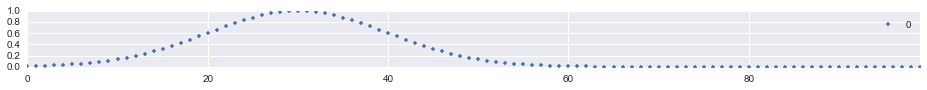

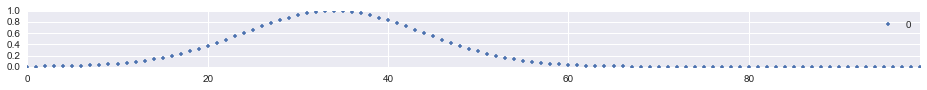

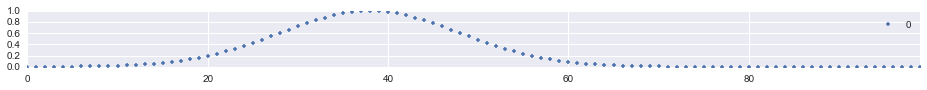

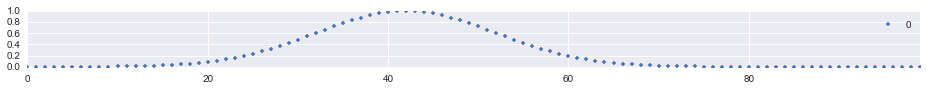

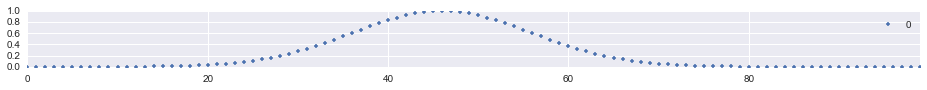

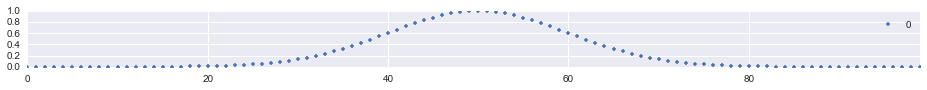

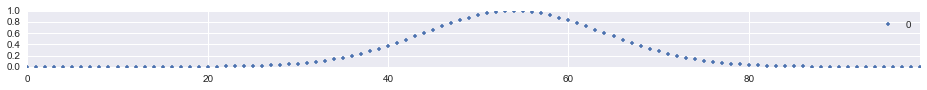

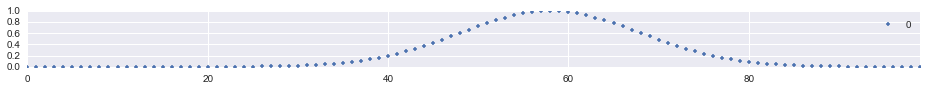

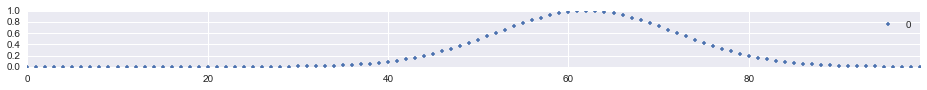

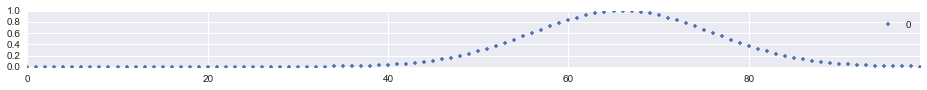

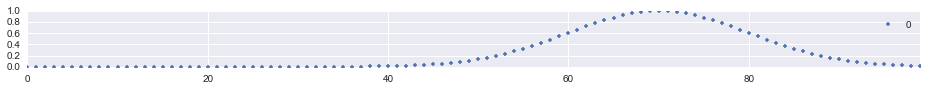

In [948]:
for v in np.arange(0.0, 1.1, 0.1):
    population = np.zeros(N)
    fill(population, v)
    df = pd.DataFrame(population)
    df.plot(style=".", figsize=(16, 1))